<a href="https://colab.research.google.com/github/hamednasr/Computer-Vision-with-Python/blob/main/body_move_detection_for_game(mediapipe).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import mediapipe as mp
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
import cv2
import os
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

C:\Users\david\AppData\Local\Temp/ipykernel_13148/3869536394.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [ ]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [ ]:
def mediapipe_detection(image,model):
    results = model.process(image)
    return image, results

In [ ]:
def draw_landmarks(img,results):

    mp_drawing.draw_landmarks(img, 
                            results.pose_landmarks,
                            mp_holistic.POSE_CONNECTIONS,
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1),
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1))
  

In [ ]:
cap = cv2.VideoCapture(0)

#initiate holistic model:
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()

        frame, results = mediapipe_detection(frame,holistic)

        draw_landmarks(frame,results)
        
        cv2.imshow('Webcam Feed', frame)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

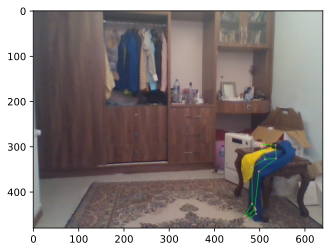

In [ ]:
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
results.pose_landmarks

landmark {
  x: 0.7886170148849487
  y: 0.6282313466072083
  z: 0.229747012257576
  visibility: 0.9715734720230103
}
landmark {
  x: 0.7810936570167542
  y: 0.6150273680686951
  z: 0.22847852110862732
  visibility: 0.9721172451972961
}
landmark {
  x: 0.7757563591003418
  y: 0.6120888590812683
  z: 0.22848033905029297
  visibility: 0.9732750058174133
}
landmark {
  x: 0.800692081451416
  y: 0.6209717988967896
  z: 0.22836458683013916
  visibility: 0.971904456615448
}
landmark {
  x: 0.789406955242157
  y: 0.6228929758071899
  z: 0.2414892017841339
  visibility: 0.9736501574516296
}
landmark {
  x: 0.7882472276687622
  y: 0.621810257434845
  z: 0.24150538444519043
  visibility: 0.9731549620628357
}
landmark {
  x: 0.7865507006645203
  y: 0.6202918291091919
  z: 0.2413097321987152
  visibility: 0.9718084335327148
}
landmark {
  x: 0.796686589717865
  y: 0.609626829624176
  z: 0.2123803198337555
  visibility: 0.9770607948303223
}
landmark {
  x: 0.7903304100036621
  y: 0.6109615564346313


In [ ]:
len(results.pose_landmarks.landmark)

33

In [ ]:
results.pose_landmarks.landmark

[x: 0.7886170148849487
y: 0.6282313466072083
z: 0.229747012257576
visibility: 0.9715734720230103
, x: 0.7810936570167542
y: 0.6150273680686951
z: 0.22847852110862732
visibility: 0.9721172451972961
, x: 0.7757563591003418
y: 0.6120888590812683
z: 0.22848033905029297
visibility: 0.9732750058174133
, x: 0.800692081451416
y: 0.6209717988967896
z: 0.22836458683013916
visibility: 0.971904456615448
, x: 0.789406955242157
y: 0.6228929758071899
z: 0.2414892017841339
visibility: 0.9736501574516296
, x: 0.7882472276687622
y: 0.621810257434845
z: 0.24150538444519043
visibility: 0.9731549620628357
, x: 0.7865507006645203
y: 0.6202918291091919
z: 0.2413097321987152
visibility: 0.9718084335327148
, x: 0.796686589717865
y: 0.609626829624176
z: 0.2123803198337555
visibility: 0.9770607948303223
, x: 0.7903304100036621
y: 0.6109615564346313
z: 0.26669180393218994
visibility: 0.9756407737731934
, x: 0.7946360111236572
y: 0.6251984238624573
z: 0.2204625904560089
visibility: 0.9727287292480469
, x: 0.787255

In [ ]:
np.array([[r.x,r.y,r.z,r.visibility] for r in results.pose_landmarks.landmark]).flatten() \
if results.pose_landmarks else np.zeros(33*4)

array([ 0.78861701,  0.62823135,  0.22974701,  0.97157347,  0.78109366,
        0.61502737,  0.22847852,  0.97211725,  0.77575636,  0.61208886,
        0.22848034,  0.97327501,  0.80069208,  0.6209718 ,  0.22836459,
        0.97190446,  0.78940696,  0.62289298,  0.2414892 ,  0.97365016,
        0.78824723,  0.62181026,  0.24150538,  0.97315496,  0.7865507 ,
        0.62029183,  0.24130973,  0.97180843,  0.79668659,  0.60962683,
        0.21238032,  0.97706079,  0.79033041,  0.61096156,  0.2666918 ,
        0.97564077,  0.79463601,  0.62519842,  0.22046259,  0.97272873,
        0.78725517,  0.62548542,  0.23617542,  0.97203588,  0.83719683,
        0.61980265,  0.13990769,  0.99623144,  0.78135061,  0.61556548,
        0.24866669,  0.99480146,  0.84767056,  0.6677137 ,  0.19278629,
        0.4051781 ,  0.75035769,  0.6596911 ,  0.2068328 ,  0.25492063,
        0.82535487,  0.65817589,  0.31428835,  0.20059855,  0.72660136,
        0.66259307,  0.09253441,  0.23908223,  0.81923354,  0.66

In [ ]:
def mediapipe_keypoints(results):
    pose = np.array([[r.x,r.y,r.z,r.visibility] for r in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    return pose

# data record:

## jump:

In [ ]:
data_path = 'bodymove_data'
no_videos = 60
sequences_length = 15

In [ ]:
for video in range(no_videos):
    try:
        os.makedirs(os.path.join(data_path,'jump',str(video)))  
    except:
        pass   

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:
    
    for video in range(no_videos):
        for frame_num in range(sequences_length):

            ret, frame = cap.read()

            image, results = mediapipe_detection(frame,holistic)

            draw_landmarks(image,results)        

            keypoints = mediapipe_keypoints(results)
#             print(keypoints)
            if frame_num==0:
                cv2.putText(image,'COLLECTION START for JUMP',(150,200),
                            cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
                cv2.putText(image,f'collecting frames for jump video numer {video}',(15,12),
                            cv2.FONT_HERSHEY_COMPLEX,.5,(0,255,0),1,cv2.LINE_AA)
                cv2.imshow('Webcam Feed', image)
                cv2.waitKey(2000)

            else:
                cv2.putText(image,f'collecting frames for jump video numer {video}',(15,12),
                cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)

                cv2.imshow('Webcam Feed', image)

            npy_path = os.path.join(data_path,'jump',str(video),str(frame_num))
            np.save(npy_path,keypoints)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()

## crouch:

In [ ]:
data_path = 'bodymove_data'
no_videos = 60
sequences_length = 15

In [ ]:
for video in range(no_videos):
    try:
        os.makedirs(os.path.join(data_path,'crouch',str(video)))  
    except:
        pass   

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:
    
    for video in range(no_videos):
        for frame_num in range(sequences_length):

            ret, frame = cap.read()

            image, results = mediapipe_detection(frame,holistic)

            draw_landmarks(image,results)        

            keypoints = mediapipe_keypoints(results)
#             print(keypoints)
            if frame_num==0:
                cv2.putText(image,'COLLECTION START for crouch',(150,200),
                            cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
                cv2.putText(image,f'collecting frames for crouch video numer {video}',(15,12),
                            cv2.FONT_HERSHEY_COMPLEX,.5,(0,255,0),1,cv2.LINE_AA)
                cv2.imshow('Webcam Feed', image)
                cv2.waitKey(2000)

            else:
                cv2.putText(image,f'collecting frames for crouch video numer {video}',(15,12),
                cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)

                cv2.imshow('Webcam Feed', image)

            npy_path = os.path.join(data_path,'crouch',str(video),str(frame_num))
            np.save(npy_path,keypoints)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()

## right_jump:

In [ ]:
data_path = 'bodymove_data'
no_videos = 60
sequences_length = 15

In [ ]:
for video in range(no_videos):
    try:
        os.makedirs(os.path.join(data_path,'right_jump',str(video)))  
    except:
        pass   

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:
    
    for video in range(no_videos):
        for frame_num in range(sequences_length):

            ret, frame = cap.read()

            image, results = mediapipe_detection(frame,holistic)

            draw_landmarks(image,results)        

            keypoints = mediapipe_keypoints(results)
#             print(keypoints)
            if frame_num==0:
                cv2.putText(image,'COLLECTION START for right_jump',(150,200),
                            cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
                cv2.putText(image,f'collecting frames for right_jump video numer {video}',(15,12),
                            cv2.FONT_HERSHEY_COMPLEX,.5,(0,255,0),1,cv2.LINE_AA)
                cv2.imshow('Webcam Feed', image)
                cv2.waitKey(2000)

            else:
                cv2.putText(image,f'collecting frames for right_jump video numer {video}',(15,12),
                cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)

                cv2.imshow('Webcam Feed', image)

            npy_path = os.path.join(data_path,'right_jump',str(video),str(frame_num))
            np.save(npy_path,keypoints)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()

## left_jump:

In [ ]:
data_path = 'bodymove_data'
no_videos = 60
sequences_length = 15

In [ ]:
for video in range(no_videos):
    try:
        os.makedirs(os.path.join(data_path,'left_jump',str(video)))  
    except:
        pass   

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:
    
    for video in range(no_videos):
        for frame_num in range(sequences_length):

            ret, frame = cap.read()

            image, results = mediapipe_detection(frame,holistic)

            draw_landmarks(image,results)        

            keypoints = mediapipe_keypoints(results)
#             print(keypoints)
            if frame_num==0:
                cv2.putText(image,'COLLECTION START for left_jump',(150,200),
                            cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
                cv2.putText(image,f'collecting frames for left_jump video numer {video}',(15,12),
                            cv2.FONT_HERSHEY_COMPLEX,.5,(0,255,0),1,cv2.LINE_AA)
                cv2.imshow('Webcam Feed', image)
                cv2.waitKey(2000)

            else:
                cv2.putText(image,f'collecting frames for left_jump video numer {video}',(15,12),
                cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)

                cv2.imshow('Webcam Feed', image)

            npy_path = os.path.join(data_path,'left_jump',str(video),str(frame_num))
            np.save(npy_path,keypoints)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()

## run:

In [ ]:
data_path = 'bodymove_data'
no_videos = 60
sequences_length = 15

In [ ]:
for video in range(no_videos):
    try:
        os.makedirs(os.path.join(data_path,'run',str(video)))  
    except:
        pass   

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:
    
    for video in range(no_videos):
        for frame_num in range(sequences_length):

            ret, frame = cap.read()

            image, results = mediapipe_detection(frame,holistic)

            draw_landmarks(image,results)        

            keypoints = mediapipe_keypoints(results)
#             print(keypoints)
            if frame_num==0:
                cv2.putText(image,'COLLECTION START for run',(150,200),
                            cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
                cv2.putText(image,f'collecting frames for run video numer {video}',(15,12),
                            cv2.FONT_HERSHEY_COMPLEX,.5,(0,255,0),1,cv2.LINE_AA)
                cv2.imshow('Webcam Feed', image)
                cv2.waitKey(2000)

            else:
                cv2.putText(image,f'collecting frames for run video numer {video}',(15,12),
                cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)

                cv2.imshow('Webcam Feed', image)

            npy_path = os.path.join(data_path,'run',str(video),str(frame_num))
            np.save(npy_path,keypoints)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()

# preprocess data, create labels and train, test split:

In [ ]:
actions = np.array(['jump','crouch','right_jump','left_jump','run'])
actions

array(['jump', 'crouch', 'right_jump', 'left_jump', 'run'], dtype='<U10')

In [ ]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'jump': 0, 'crouch': 1, 'right_jump': 2, 'left_jump': 3, 'run': 4}

In [ ]:
sequences = []
labels = []

for action in actions:
  for video in range(no_videos):
    window = []
    for frame_num in range(sequences_length):
      res = np.load(os.path.join(data_path,action,str(video),f'{frame_num}.npy'))
      window.append(res)
    sequences.append(window)
    labels.append(label_map[action])

In [ ]:
print(np.array(window).shape)
print(np.array(sequences).shape)
print(np.array(labels).shape)

(15, 132)
(300, 15, 132)
(300,)


In [ ]:
X = np.array(sequences)
y = np.array(labels)

In [ ]:
X.shape

(300, 15, 132)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=22)

In [ ]:
X_train.shape, X_test.shape

((255, 15, 132), (45, 15, 132))